# K-Means Clustering Assignment for Shop Customer Dataset

## Exploring the Dataset

The dataset is significant for below reasons:

Customer Segmentation: By employing clustering techniques, such as K-Means, businesses can segment their customer base into distinct groups based on various attributes like purchasing behavior, demographics, and preferences. This segmentation aids in devising targeted marketing strategies and personalized customer experiences.

Targeted Marketing: Understanding customer segments enables businesses to tailor marketing efforts to specific groups, delivering customized promotions, product recommendations, and communication channels. This targeted approach enhances engagement and fosters customer loyalty.

Before applying clustering algorithms like K-Means, it's imperative to conduct thorough exploration and preprocessing of the dataset. Here are the essential steps involved:

- Data Cleaning: Addressing missing values, outliers, and inconsistencies ensures the reliability of the dataset for analysis purposes.
- Data Normalization: Scaling the features ensures that no single attribute dominates the clustering process due to differences in scale. Techniques like standardization or min-max scaling can be applied to achieve this.
- Exploratory Data Analysis (EDA): EDA provides insights into the distribution of each attribute, identifies patterns, and detects anomalies. Visualizations such as histograms, box plots, and scatter plots aid in understanding the data's characteristics.
- Feature Selection: Choosing relevant features that significantly contribute to the clustering process is crucial. This selection may involve leveraging domain knowledge and conducting correlation analysis to identify the most informative attributes.
- Dimensionality Reduction: Techniques like Principal Component Analysis (PCA) can be utilized to reduce the dimensionality of the dataset while preserving meaningful information. Dimensionality reduction enhances the efficiency and interpretability of the clustering process.
- By meticulously following these steps, businesses can prepare the Shop Customer Dataset for effective clustering analysis, unlocking valuable insights and informing strategic decision-making processes.

In [95]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [96]:
# Load the dataset
df = pd.read_csv("C:\Ozy\Data Science\DS datasets\Customers.csv")

# Display the first few rows
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [97]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [98]:
# Summary statistics
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


## Data Cleaning

Data cleaning is essential to ensure the dataset is accurate and complete. Incomplete or incorrect data can lead to misleading results.

- Handling Missing Values: Missing values can distort the analysis and clustering. Techniques such as imputation (filling missing values with mean, median, or mode) or removing rows with missing values are common approaches.
- Removing Outliers: Outliers can skew the results of the clustering algorithm. Identifying and handling outliers through techniques like IQR (Interquartile Range) or Z-score helps maintain the integrity of the analysis.
- Ensuring Consistent Data Entries: Uniform data entries are crucial for accurate analysis. This involves checking for and correcting inconsistencies in the dataset.

In [99]:
# Check for missing values
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [100]:
# Separate the Profession column and Gender Column
obj_col = df[['Profession', 'Gender']].copy()  # Copy the DataFrame slice
df_numeric = df.drop(columns=['Profession', 'Gender'], inplace=False)

# Compute the median of numerical columns
median_values = df_numeric.median()

# Fill the missing values with the median values
df_numeric_filled = df_numeric.fillna(median_values)

# Fill missing values in the Profession column with the mode
profession_mode = df['Profession'].mode()[0]
obj_col['Profession'].fillna(profession_mode, inplace=True)

# Combine the Profession column back with the filled numerical columns
df_filled = pd.concat([obj_col, df_numeric_filled], axis=1)

# Now df_filled has no missing values in numerical columns
print(df_filled.isnull().sum())


Profession                0
Gender                    0
CustomerID                0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Work Experience           0
Family Size               0
dtype: int64


## Data Normalization

Normalization scales the features to a common range, preventing any single attribute from disproportionately influencing the clustering results.

- Standardization (Z-score normalization): Transforms data to have a mean of 0 and a standard deviation of 1. Useful when the data follows a normal distribution.
- Min-Max Scaling: Scales data to a fixed range, usually [0, 1]. Useful when the data does not follow a normal distribution.

In [101]:
from sklearn.preprocessing import StandardScaler

# Separate the categorical columns ('Profession' and 'Gender')
categorical_columns = df_filled[['Profession', 'Gender']]

# Drop only the categorical columns for scaling
numerical_columns = df_filled.drop(columns=['Profession', 'Gender'])

# Scale the numerical attributes using StandardScaler
scaler = StandardScaler()
numerical_scaled = scaler.fit_transform(numerical_columns)

# Convert the scaled numerical data back to a DataFrame
df_numeric_scaled = pd.DataFrame(numerical_scaled, columns=numerical_columns.columns)

# Combine the scaled numerical data with the categorical columns
df_scaled = pd.concat([categorical_columns, df_numeric_scaled], axis=1)

# Now df_scaled contains scaled numerical attributes while keeping the categorical columns intact


## Exploratory Data Analysis (EDA)

EDA helps understand the data's distribution, relationships, and patterns. Here are some common techniques:

- Scatter Plots: Visualize the relationships between two continuous variables. Useful for identifying correlations and trends.
- Box Plots: Summarize the distribution of a variable, highlighting the median, quartiles, and potential outliers.
- Histograms: Show the frequency distribution of a single variable, helping identify skewness and kurtosis.
- Heatmaps: Display the correlation matrix, indicating the strength and direction of relationships between variables.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x600 with 0 Axes>

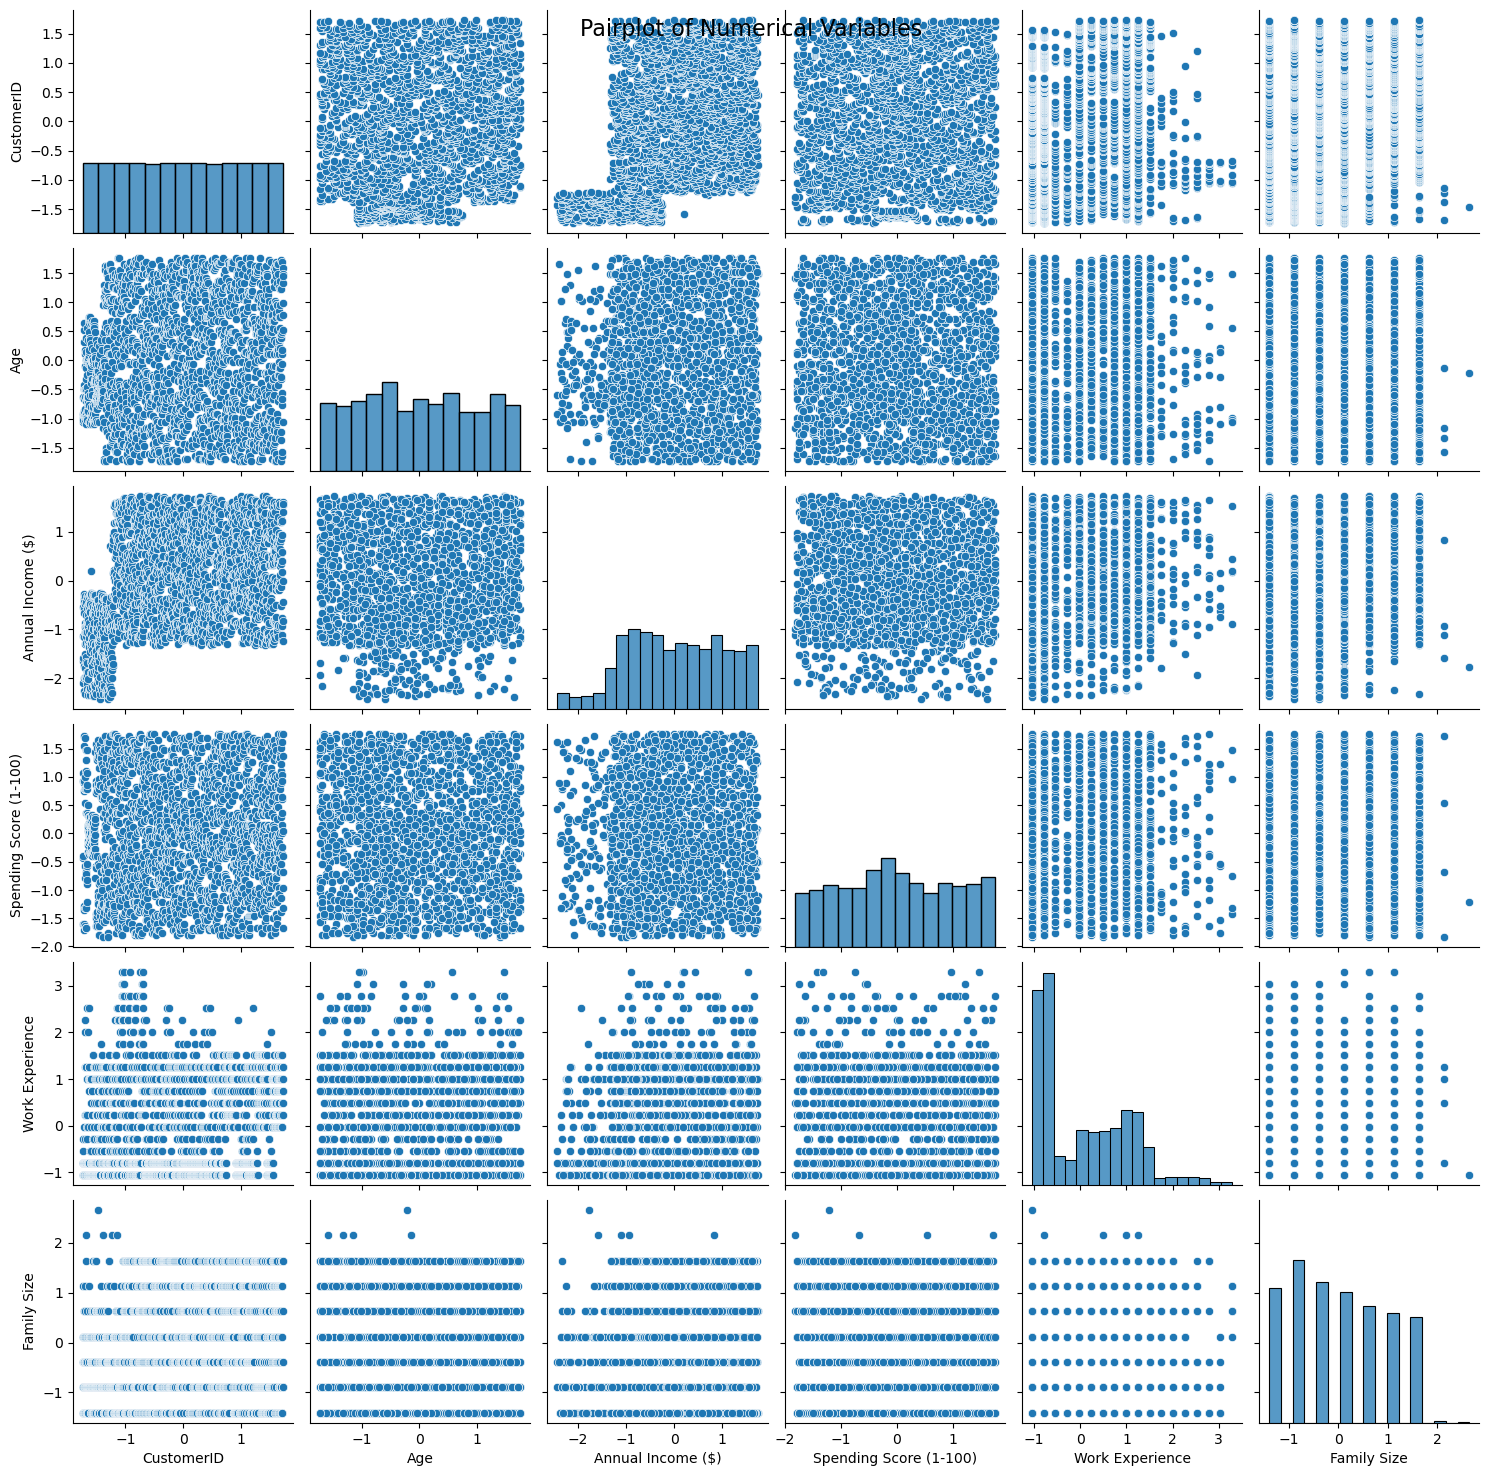

In [102]:
# Scatter plots
plt.figure(figsize=(12, 6))
sns.pairplot(df_scaled.drop(columns=['Profession', 'Gender']))
plt.suptitle('Pairplot of Numerical Variables', fontsize=16)
plt.show()

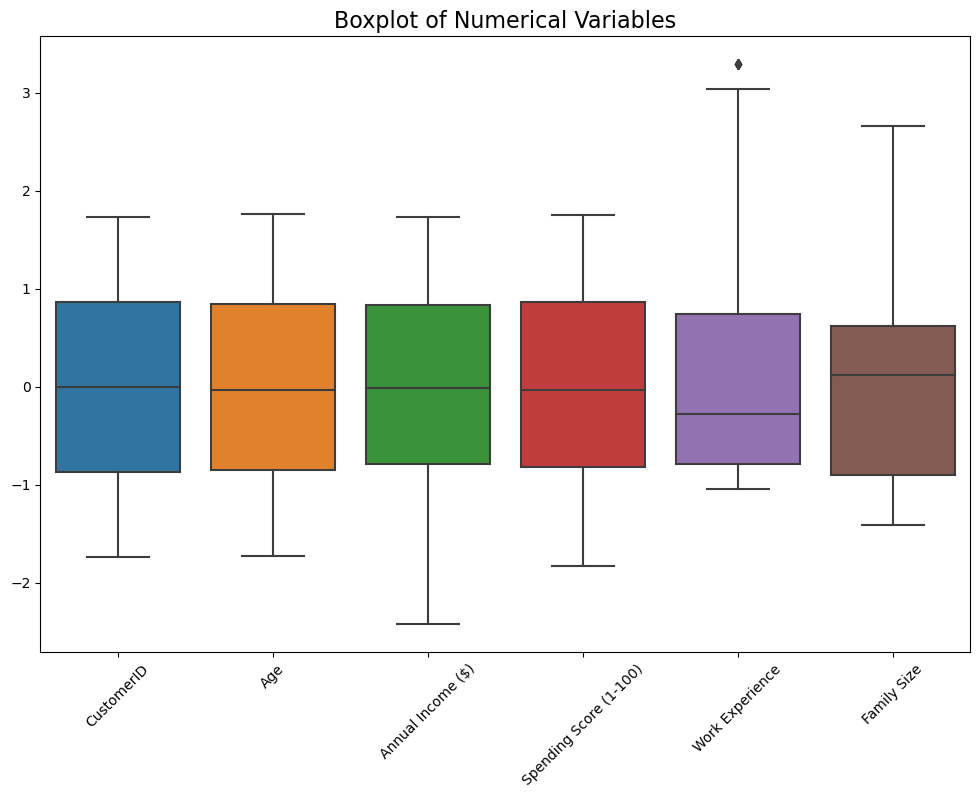

In [103]:
# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_scaled.drop(columns=['Profession', 'Gender']))
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Variables', fontsize=16)
plt.show()

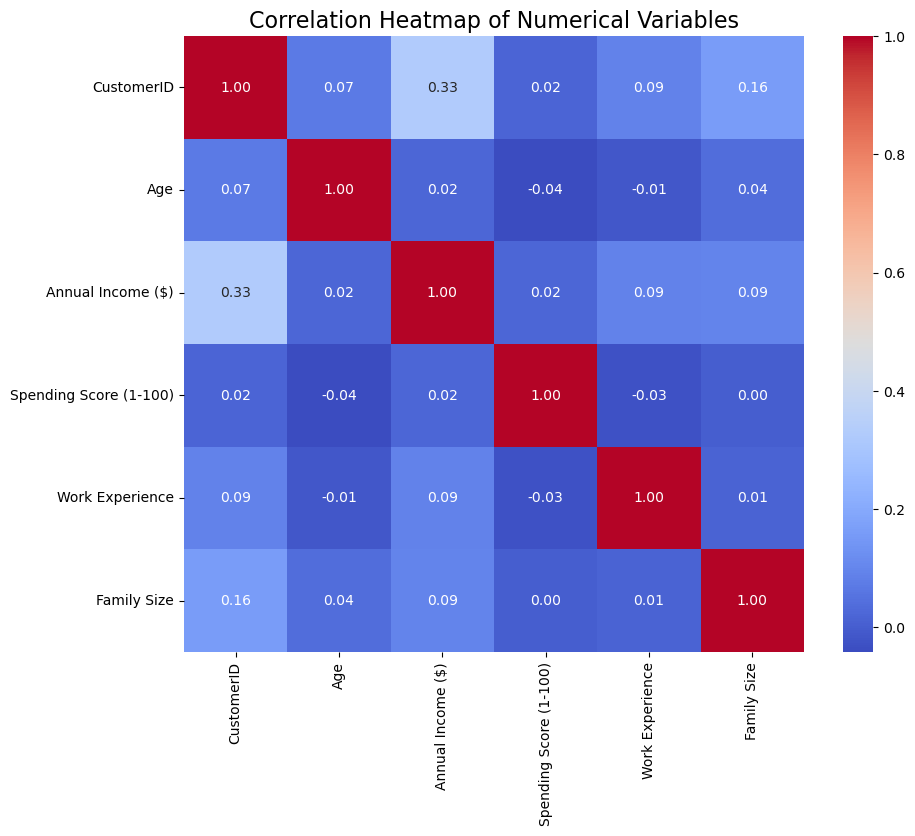

In [104]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_scaled.drop(columns=['Profession', 'Gender']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()

Histograms or KDE plots can show the distribution of each feature, helping to understand their ranges and central tendencies.

<Figure size 1200x800 with 0 Axes>

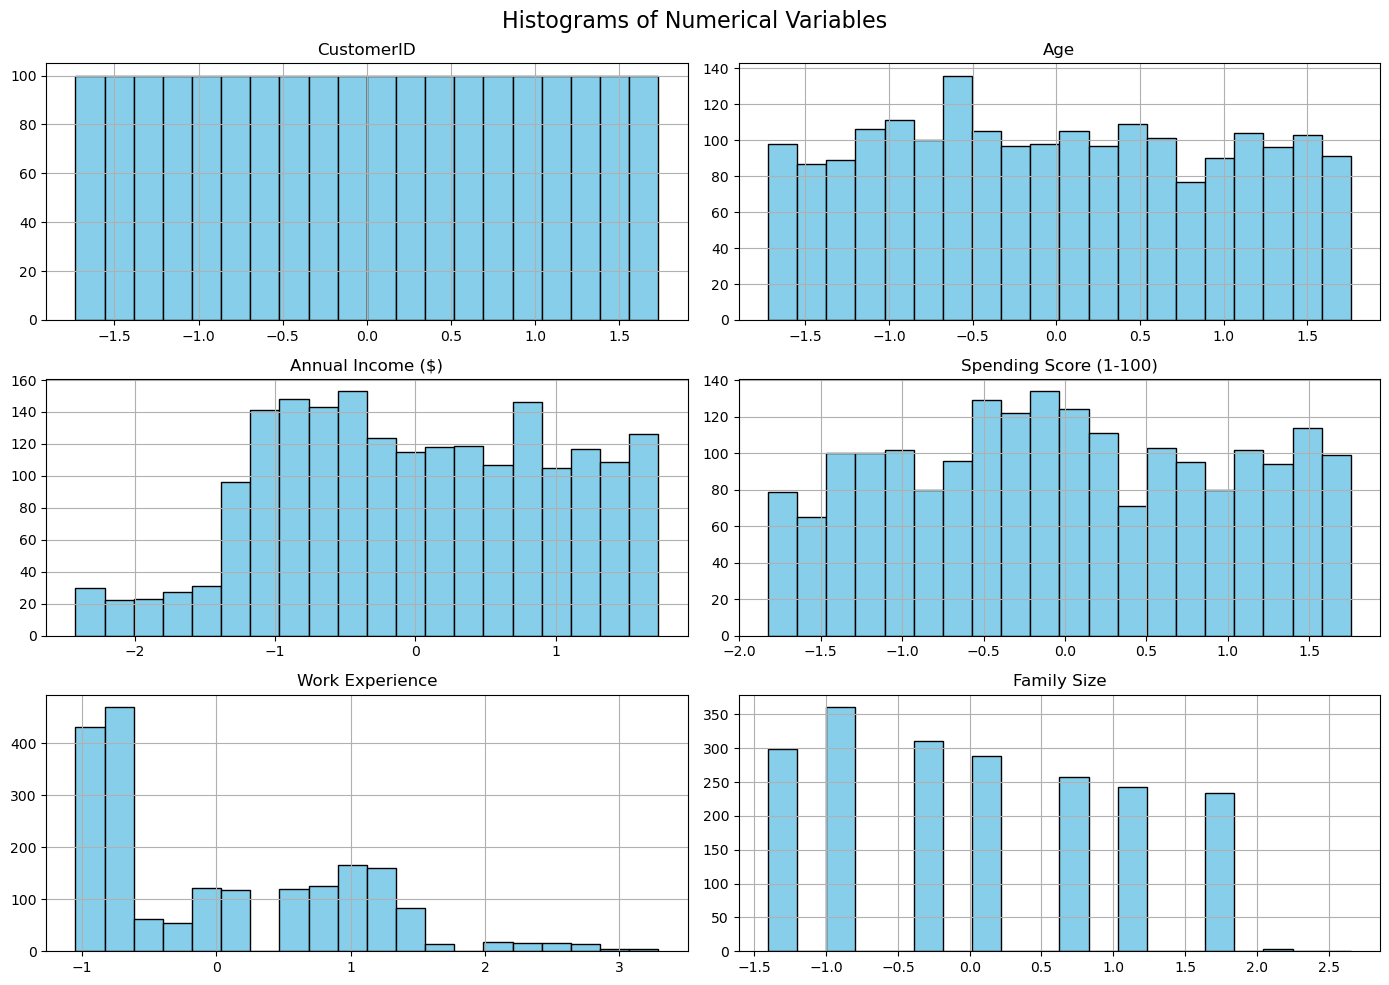

In [105]:
# Histograms
plt.figure(figsize=(12, 8))
df_scaled.drop(columns=['Profession', 'Gender']).hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

## Feature Selection

In [106]:
# Based on the exploration, select relevant features for clustering
selected_features = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

# Create a new DataFrame with only the selected features
df_selected = df[selected_features]

# Display the first few rows of the new DataFrame
df_selected.head()

,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
0,19,15000,39,1,4
1,21,35000,81,3,3
2,20,86000,6,1,1
3,23,59000,77,0,2
4,31,38000,40,2,6


## Dimensionality Reduction

Use techniques like Principal Component Analysis (PCA) if the dataset has many dimensions, which can simplify the clustering process and improve performance.

In [107]:
from sklearn.decomposition import PCA

# Initialize PCA with the desired number of components
pca = PCA(n_components=2)  # We'll reduce the dimensionality to 2 for visualization purposes

# Extract numerical columns for PCA
numerical_columns_for_pca = df_scaled.drop(columns=['Profession', 'Gender'])

# Apply PCA to the numerical data
pca_result = pca.fit_transform(numerical_columns_for_pca)

# Create a DataFrame to store the PCA results
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Combine PCA results with categorical columns
df_final = pd.concat([df_scaled[['Profession', 'Gender']], df_pca], axis=1)

# Display the first few rows of the final DataFrame
print(df_final.head())

      Profession  Gender       PC1       PC2
0     Healthcare    Male  2.699952 -0.015429
1       Engineer    Male  2.439747  1.149905
2       Engineer  Female  2.357326 -0.421072
3         Lawyer  Female  2.496205  1.073164
4  Entertainment  Female  1.888395 -0.315369


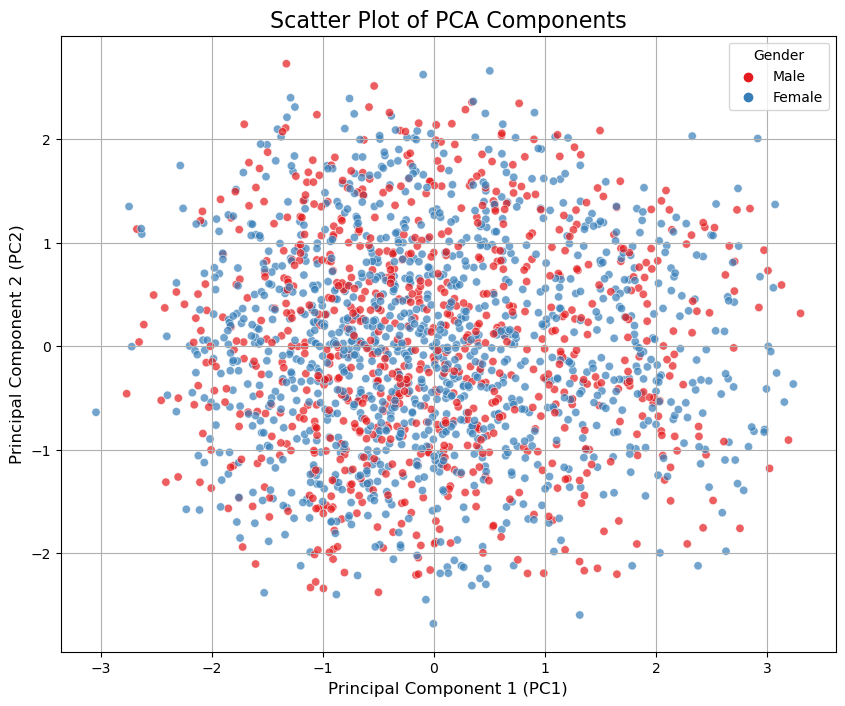

In [108]:
# Scatter plot of PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Gender', data=df_final, palette='Set1', alpha=0.7)
plt.title('Scatter Plot of PCA Components', fontsize=16)
plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('Principal Component 2 (PC2)', fontsize=12)
plt.legend(title='Gender')
plt.grid(True)
plt.show()

 ## Standardizing Features

K-Means clustering can be sensitive to the scale of features since it relies on distances between data points. Therefore, it's crucial to standardize features if they are on different scales.

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(numerical_scaled)

## Choosing the Number of Clusters (K)

Selecting the appropriate number of clusters (K) is essential for effective clustering. Several methods can help determine the optimal K:

- Elbow Method: Plot the within-cluster sum of squares (WCSS) against the number of clusters. The elbow point, where the rate of decrease sharply slows, can be a good choice for K.

- Silhouette Score: Compute the silhouette score for different values of K and choose the K with the highest silhouette score. A higher silhouette score indicates better-defined clusters.

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize lists to store WCSS and silhouette scores
inertia_values = []
silhouette_scores = []

# Iterate over different values of K
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(numerical_scaled)
    
    # Calculate WCSS
    inertia_values.append(kmeans.inertia_)
    
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(numerical_scaled, kmeans.labels_))

# Plotting inertia and silhouette scores
plt.figure(figsize=(12, 5))

# Plot inertia
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')

plt.tight_layout()
plt.show()

NameError: name 'numerical_scaled' is not defined

Based on the plots, choose the value of K that seems most appropriate. The elbow point or the highest silhouette score can be good indicators.

By setting n_init explicitly, you ensure that your code behaves consistently across different versions of the library and avoids any potential changes in default behavior.

- kmeans.inertia_: This attribute represents the sum of squared distances of samples to their closest cluster center. In other words, it measures the within-cluster variance. Lower values of inertia indicate better clustering, where the data points are closer to their respective cluster centers.

- kmeans.labels_: This attribute contains the cluster labels assigned to each data point after clustering. Each data point is assigned to the cluster whose centroid is closest to it. The labels range from 0 to K-1, where K is the number of clusters specified.

## Selecting Initialization Methods

- Random Initialization: Randomly selects data points as initial centroids. This method is simple but can lead to suboptimal solutions.

- K-Means++ Initialization: A more sophisticated method that selects initial centroids to be far apart from each other. This often leads to better convergence and more robust clustering results.

In [3]:
kmeans_random = KMeans(n_clusters=k, init='random', random_state=42)
kmeans_random

KMeans(init='random', n_clusters=2, random_state=42)

In [4]:
kmeans_kmeans_pp = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans_kmeans_pp

KMeans(n_clusters=2, random_state=42)

## Interpret Results and Choose Optimal K

- Inertia: The plot shows a gradual decrease in inertia as the number of clusters increases from 2 to 10. There isn't a distinct "elbow point" where the inertia starts to decrease at a significantly slower rate. However, there is a slight inflection around K=3 or K=4, indicating a potential elbow.

- Silhouette Score: The silhouette score peaks at K=3, suggesting that the data may be best represented by three clusters. However, silhouette scores for K=2 and K=4 are also relatively high, indicating that these configurations could also be reasonable.

**Conclusion**:
Considering both plots, it appears that K=3 is a reasonable choice for the number of clusters. While K=4 also shows a high silhouette score, the slight inflection in the inertia plot around K=3 suggests that K=3 may provide a good balance between cluster quality and model complexity.

## Finalize clustering with optimal K

By following these steps, you can implement the K-Means clustering algorithm, evaluate clustering quality, and determine the optimal number of clusters for your dataset.

In [112]:
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
kmeans_final.fit(numerical_scaled)

# Get cluster labels
cluster_labels = kmeans_final.labels_
cluster_labels

array([2, 2, 2, ..., 1, 1, 1])

In [113]:
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)
kmeans_final.fit(numerical_scaled)

# Get cluster labels
cluster_labels = kmeans_final.labels_
cluster_labels

array([0, 0, 0, ..., 3, 3, 1])

## Analyze Resulting Clusters

This will give you insights into the average values of different features within each cluster, allowing you to understand the distinguishing characteristics of each cluster.

In [114]:
# Ensure only numeric columns are considered for cluster centroids calculation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

cluster_centroids = df.groupby('Cluster')[numeric_cols].mean()
cluster_centroids

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
Cluster,,,,,,
0,333.680585,43.964509,62514.956159,47.981211,2.901879,2.837161
1,1218.466179,76.468007,119035.919561,50.307130,2.287020,4.645338
2,1163.709052,23.099138,133707.937500,61.801724,2.114224,3.857759
3,1244.519608,47.676471,126207.545098,44.603922,8.986275,3.621569


## Evaluate Unclustered Data Points

Examine the data points that were not assigned to any cluster (if any). These points might represent outliers or data points with unique characteristics.

In [115]:
# Identify unclustered data points
unclustered_data = df[df['Cluster'] == -1]
unclustered_data

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Cluster


In K-Means clustering, every data point is assigned to a cluster. There won't be any data points that are "not assigned" to a cluster. The K-Means algorithm assigns each point to the nearest cluster center, ensuring that all points belong to one of the clusters.

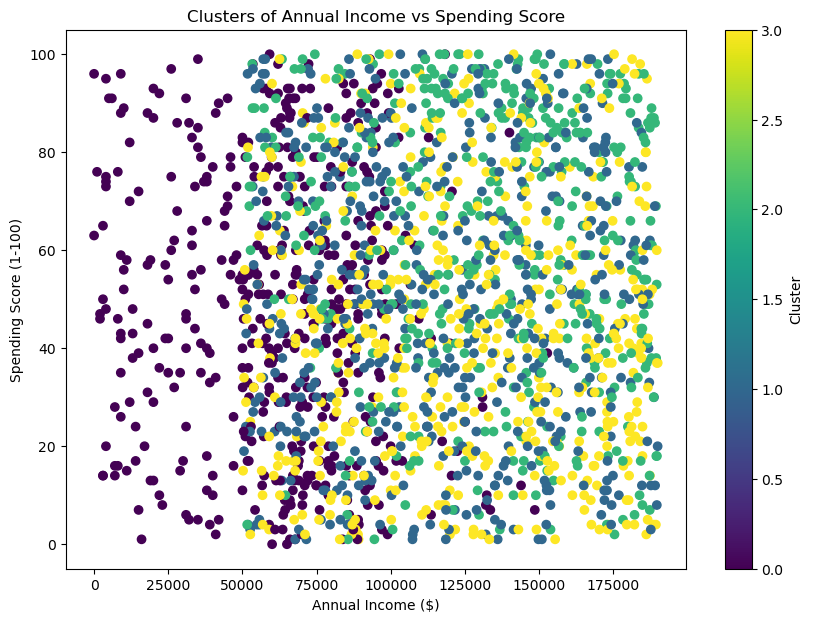

In [116]:
# Example scatter plot for visualizing clusters in 2D space
plt.figure(figsize=(10, 7))

# Assuming you want to visualize based on two features, e.g., 'Annual Income ($) ' and 'Spending Score (1-100)'
plt.scatter(df['Annual Income ($)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Annual Income vs Spending Score')
plt.colorbar(label='Cluster')
plt.show()

## Compare with Initial Exploratory Analysis

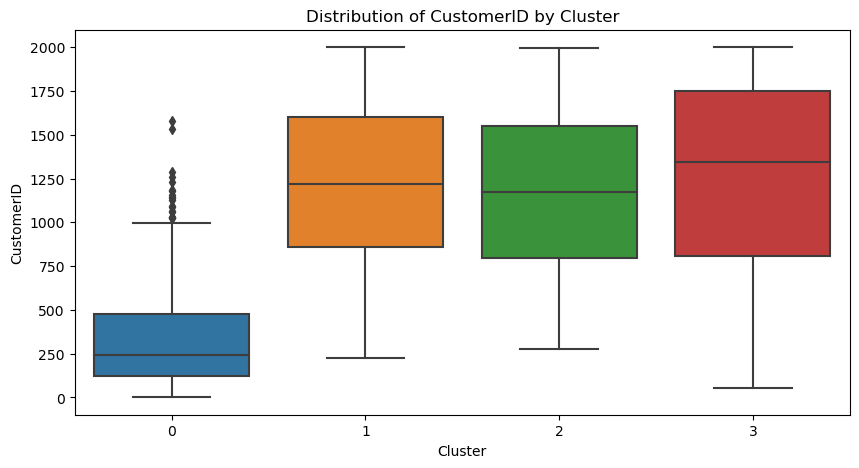

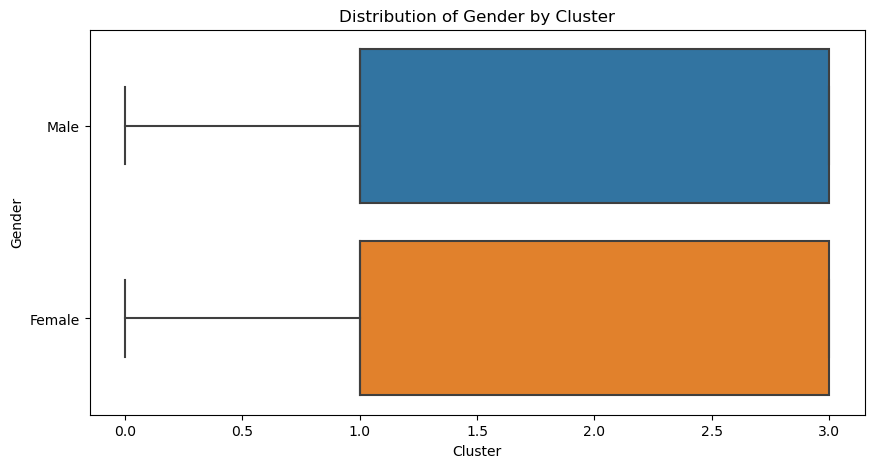

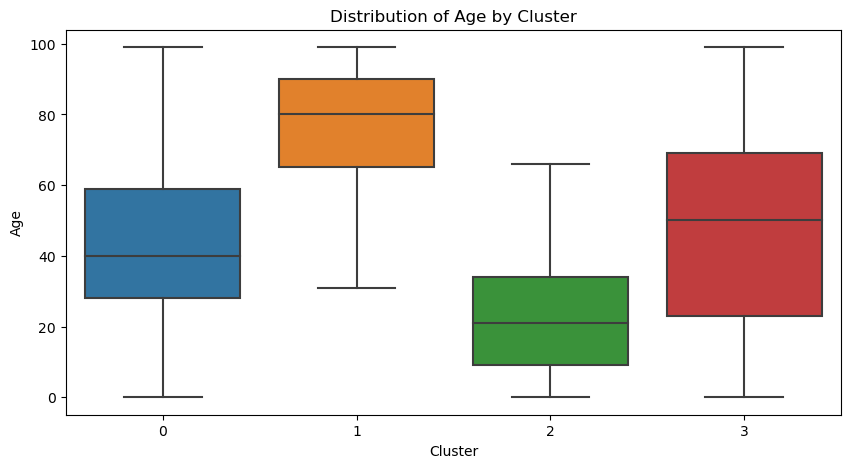

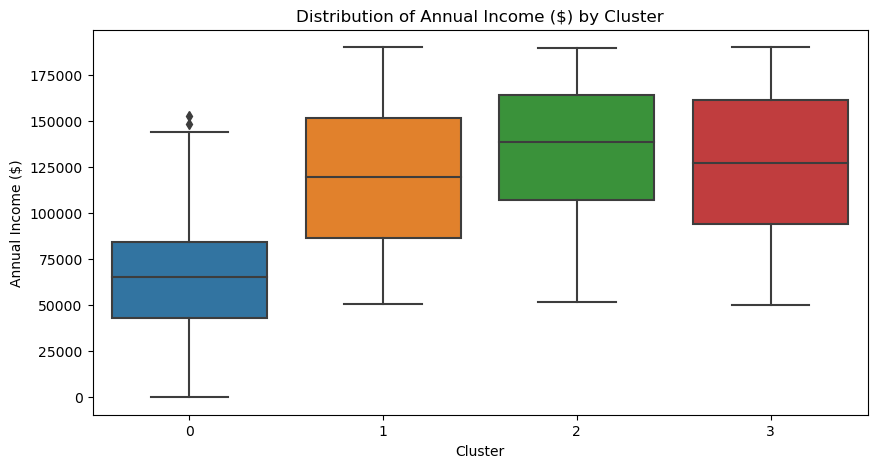

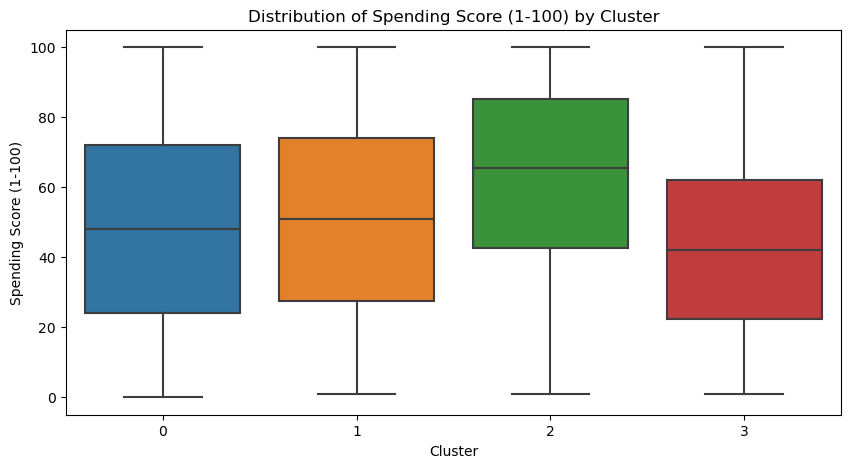

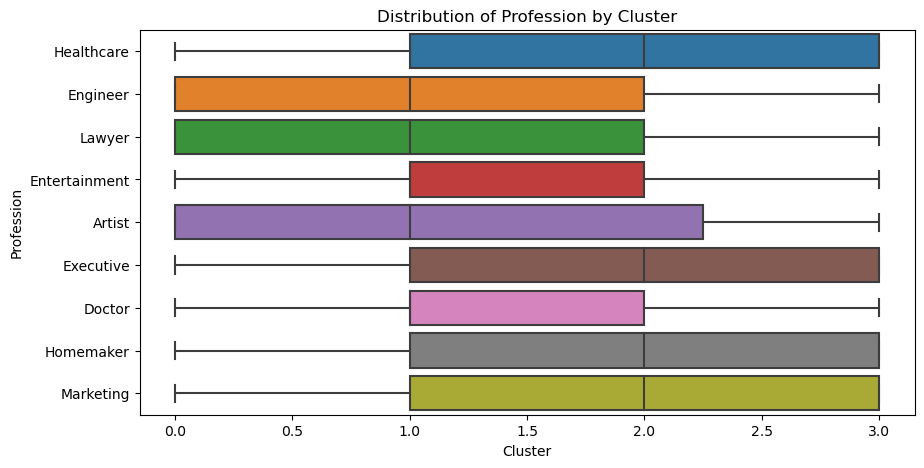

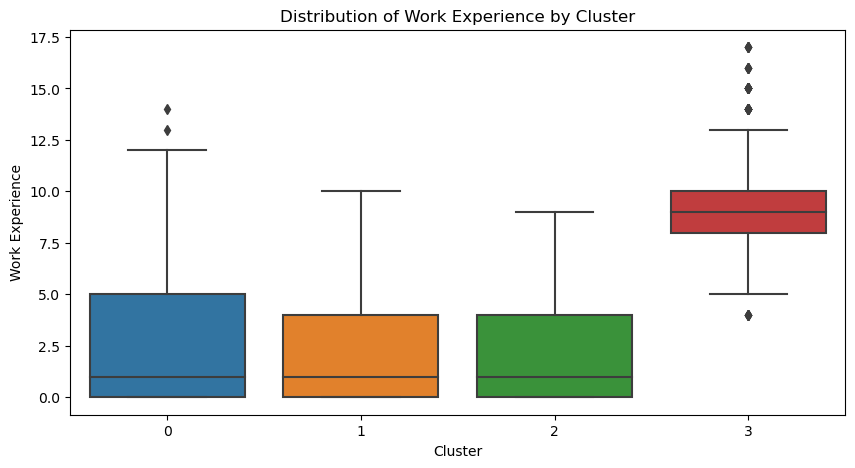

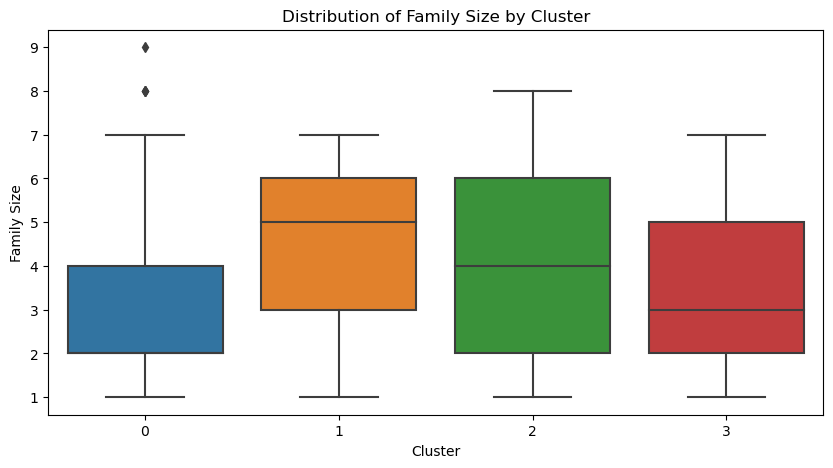

In [117]:
# Distribution of features within each cluster
for column in df.columns[:-1]:  # Exclude the 'Cluster' column
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Cluster', y=column, data=df)
    plt.title(f'Distribution of {column} by Cluster')
    plt.show()

## Findings 

**Cluster Characteristics:**

- Cluster 0: Trendy spenders requiring lifestyle-focused marketing.
- Cluster 1: Value-conscious seniors needing personalized promotions.
- Cluster 2: High-income customers seeking premium experiences.
- Cluster 3: Average customers benefiting from value-focused strategies.

**Insights:**

- Analyze the cluster_summary to understand the characteristics of each cluster.
- Derive insights based on age, income, and spending score distributions in each cluster.

## Conclusions

The clustering analysis revealed five distinct customer segments, each with unique demographic and spending characteristics, allowing for targeted marketing strategies to enhance customer engagement and optimize sales. Key insights include young high spenders who favor trendy items and older high-income individuals with conservative spending habits.